In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()

In [432]:
df0 = pd.read_csv("esp32-temp_0.csv",names=["topic","time_string","temp"])
df1 = pd.read_csv("esp32-temp_1.csv",names=["topic","time_string","temp"])
df_bat = pd.read_csv("battery_millivolts.csv", names=["topic","time_string","millivolts"])
df_bat2 = pd.read_csv("6c744ffa12f4-battery_volts.csv", names=["topic","time_string","volts"])

In [433]:
for df in [df0, df1, df_bat, df_bat2]:
    df["datetime"]=pd.to_datetime(df["time_string"])
    df.set_index(["datetime"], drop=False, inplace=True)


In [434]:
end_time = df0["datetime"].max()
start_time = end_time-np.timedelta64(1, 'h')

In [435]:
str(start_time),str(end_time)


('2022-12-30 05:59:50.915000+00:00', '2022-12-30 06:59:50.915000+00:00')

2022-12-21 21:23:00.000000+00:00
2022-12-30 06:59:50.915000+00:00


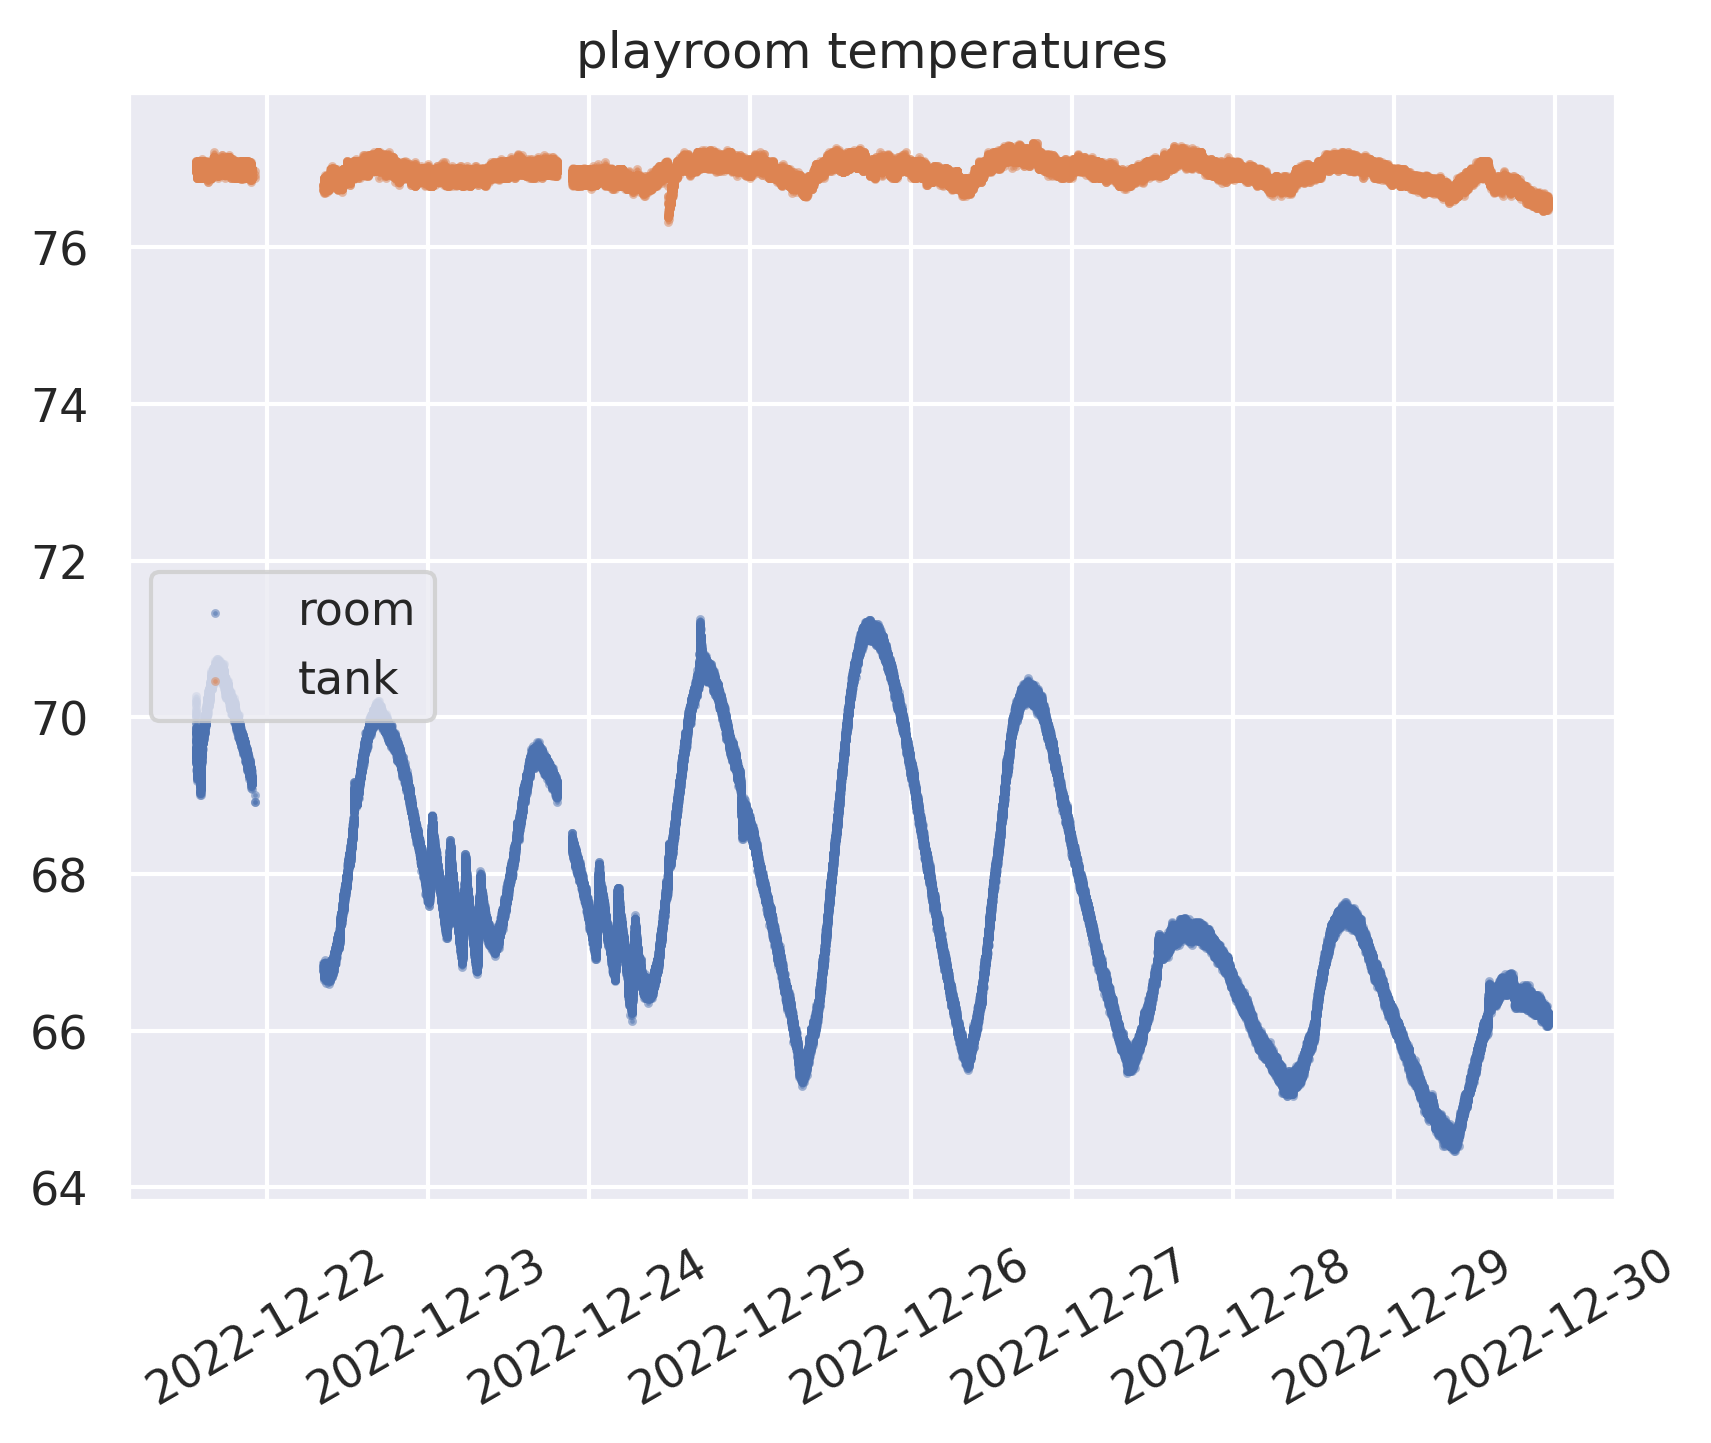

In [436]:
count = 1000;
marker_size = 5;
#start_time = df0["datetime"].max()-np.timedelta64(2*60*24, 'm')
start_time = '2022-12-21 21:23:00.000000+00:00'

#start_time = str(df0["datetime"].min())
end_time = df0["datetime"].max()

print (start_time)
print (end_time)
plt_df = df0[(df0["datetime"]>start_time) & (df0["datetime"]<=end_time)]

plt.axes().xaxis_date("America/Los_Angeles")
plt.scatter(plt_df["datetime"],plt_df["temp"], marker='.', s=marker_size,label='room',alpha=0.5);
# plt.scatter(x=df0.loc[start_time:end_time]["datetime"],y=df0.loc[start_time:end_time]["temp"], tz="America/Los_Angeles", marker='.', s=marker_size,label='room',alpha=0.5);
plt.scatter(df1.loc[start_time:end_time]["datetime"],df1.loc[start_time:end_time]["temp"], marker='.', s=marker_size, label='tank',alpha=0.5);

plt.legend(loc='center left');
plt.xticks(rotation=30);
plt.title("playroom temperatures");


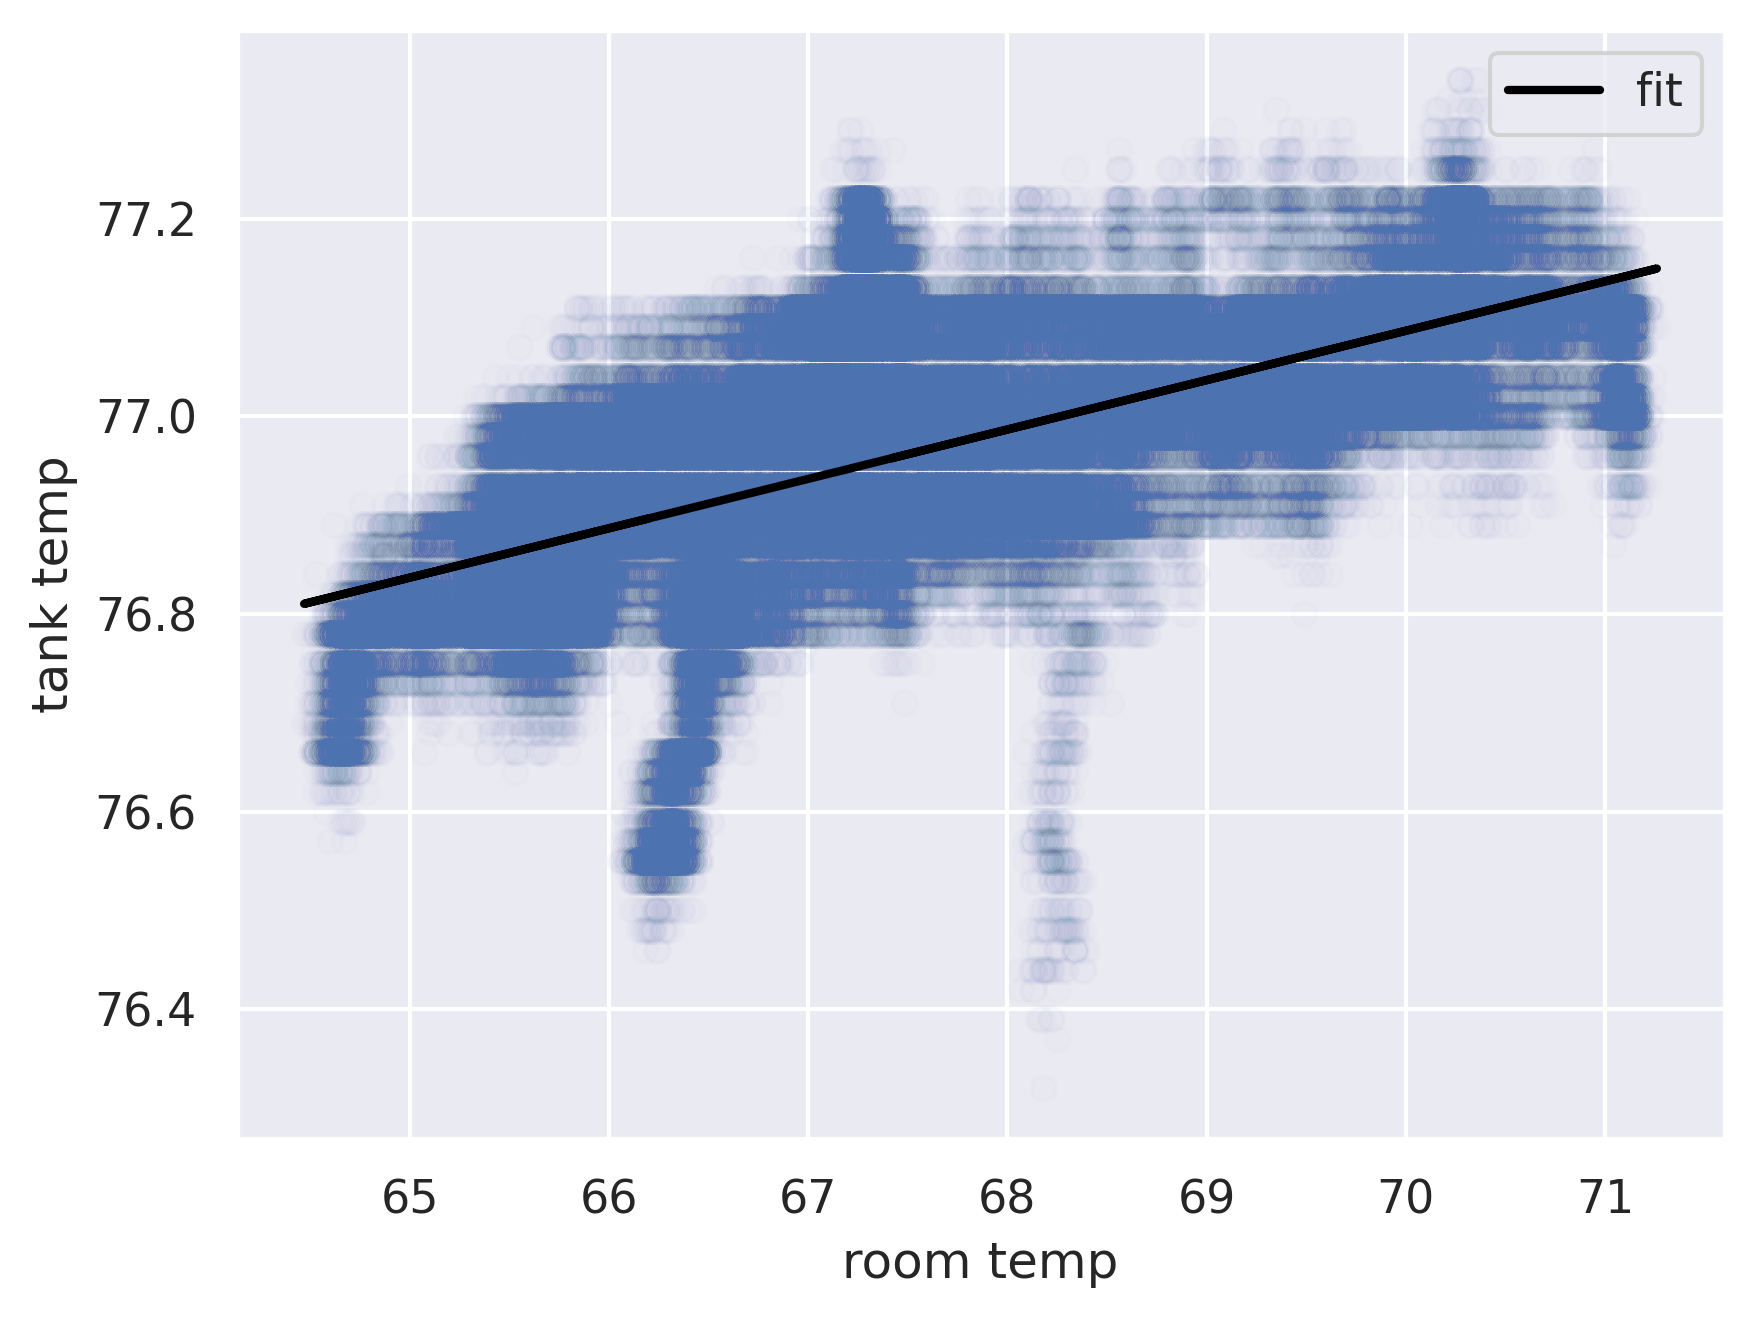

In [437]:
max_index = min(len(df0),len(df1))
rows = slice(20000,max_index)
x = df0.iloc[rows]["temp"]
y  = df1.iloc[rows]["temp"]
b, a = np.polyfit(x, y, deg=1)
plt.scatter(x,y,alpha=0.01)
plt.plot(
    x,
    a + b * x,  
    color="black",
    lw=2, 
    #linestyle=":"
    label="fit"
    );
plt.xlabel("room temp")
plt.ylabel("tank temp")
plt.legend();

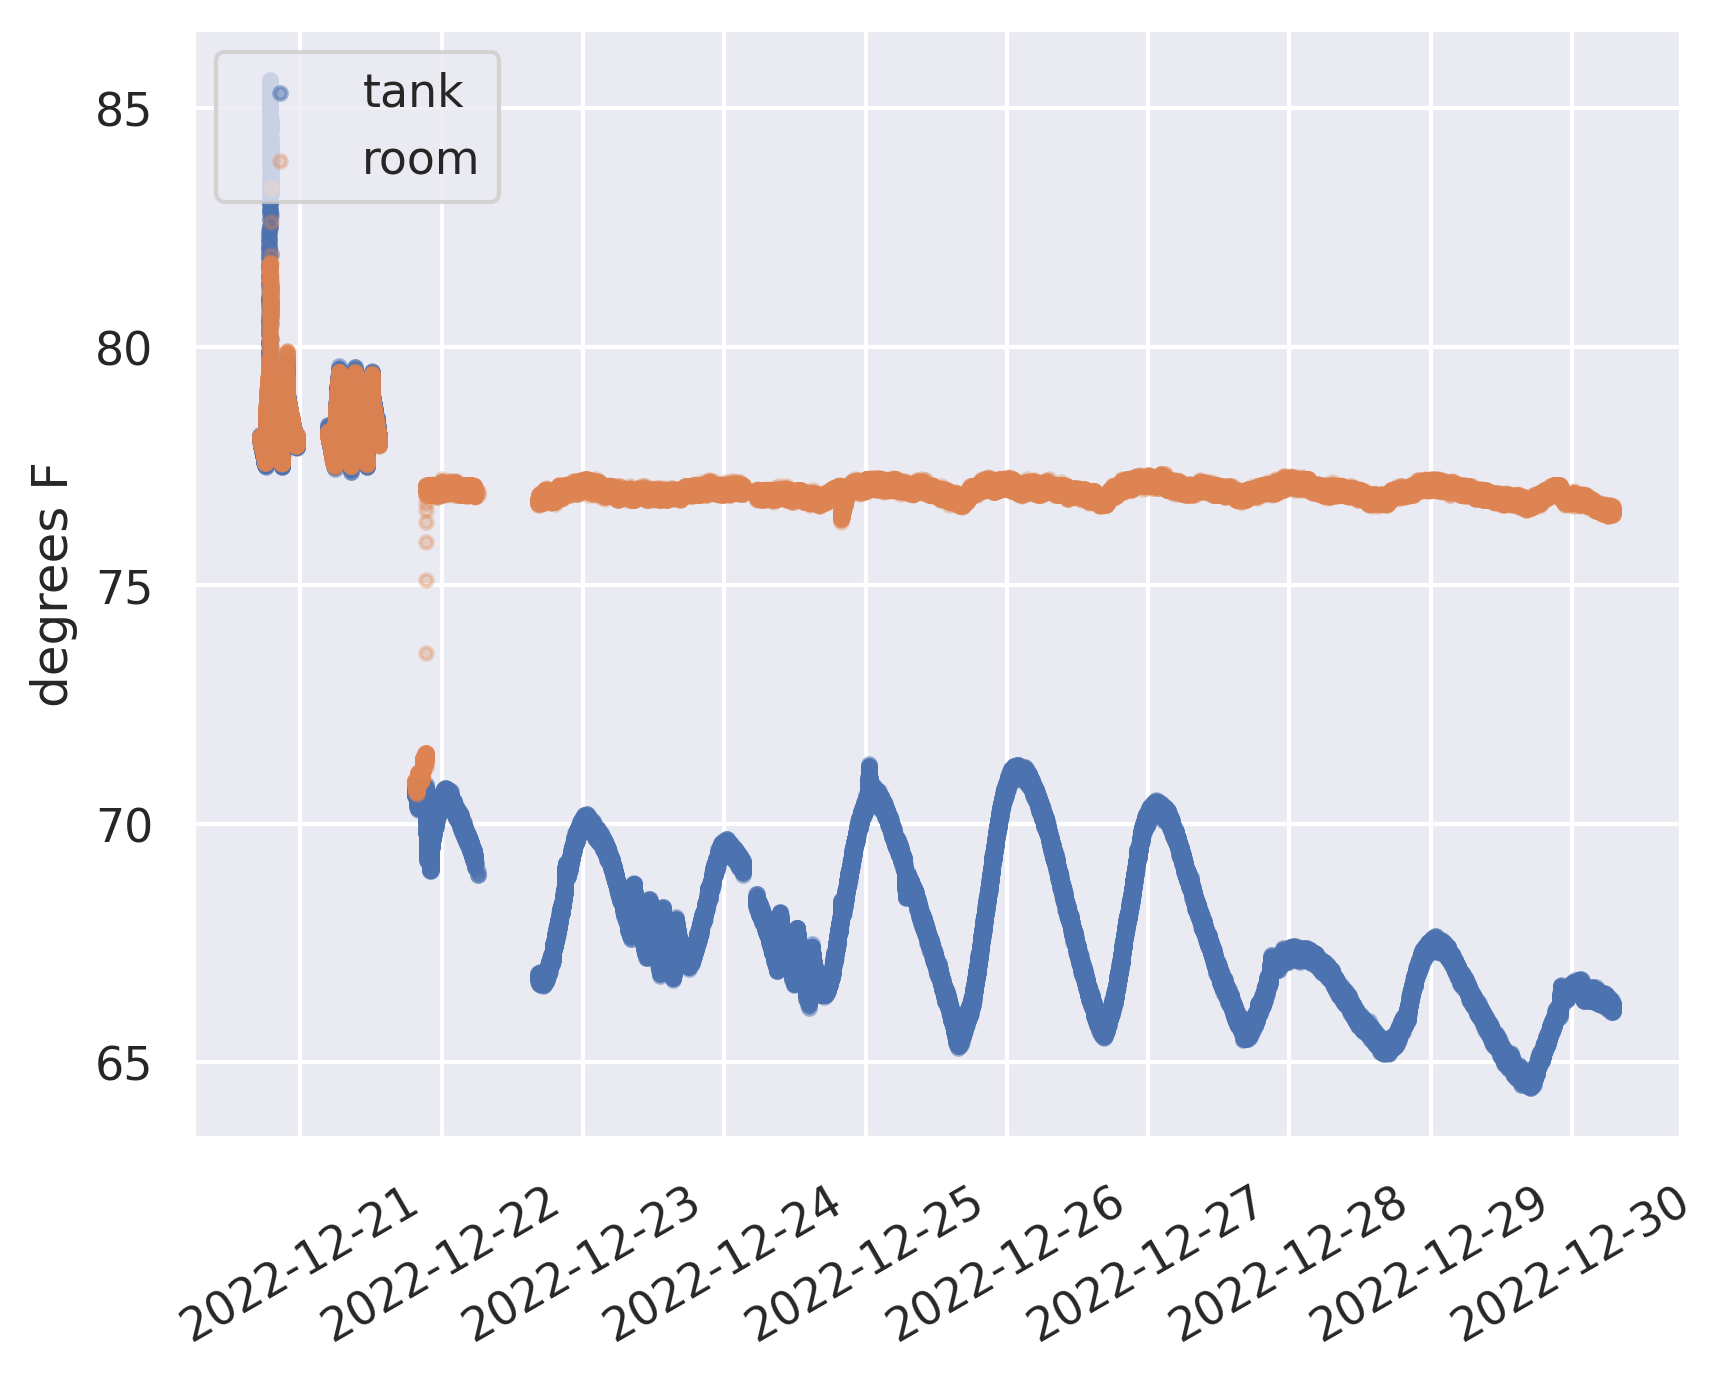

In [438]:
plt.scatter(df0["datetime"],df0["temp"], marker='.', label='tank',alpha=0.5);
plt.scatter(df1["datetime"],df1["temp"], marker='.', label='room',alpha=0.3);
plt.ylabel('degrees F')
plt.legend(loc='upper left');
plt.xticks(rotation=30);

plt.show();

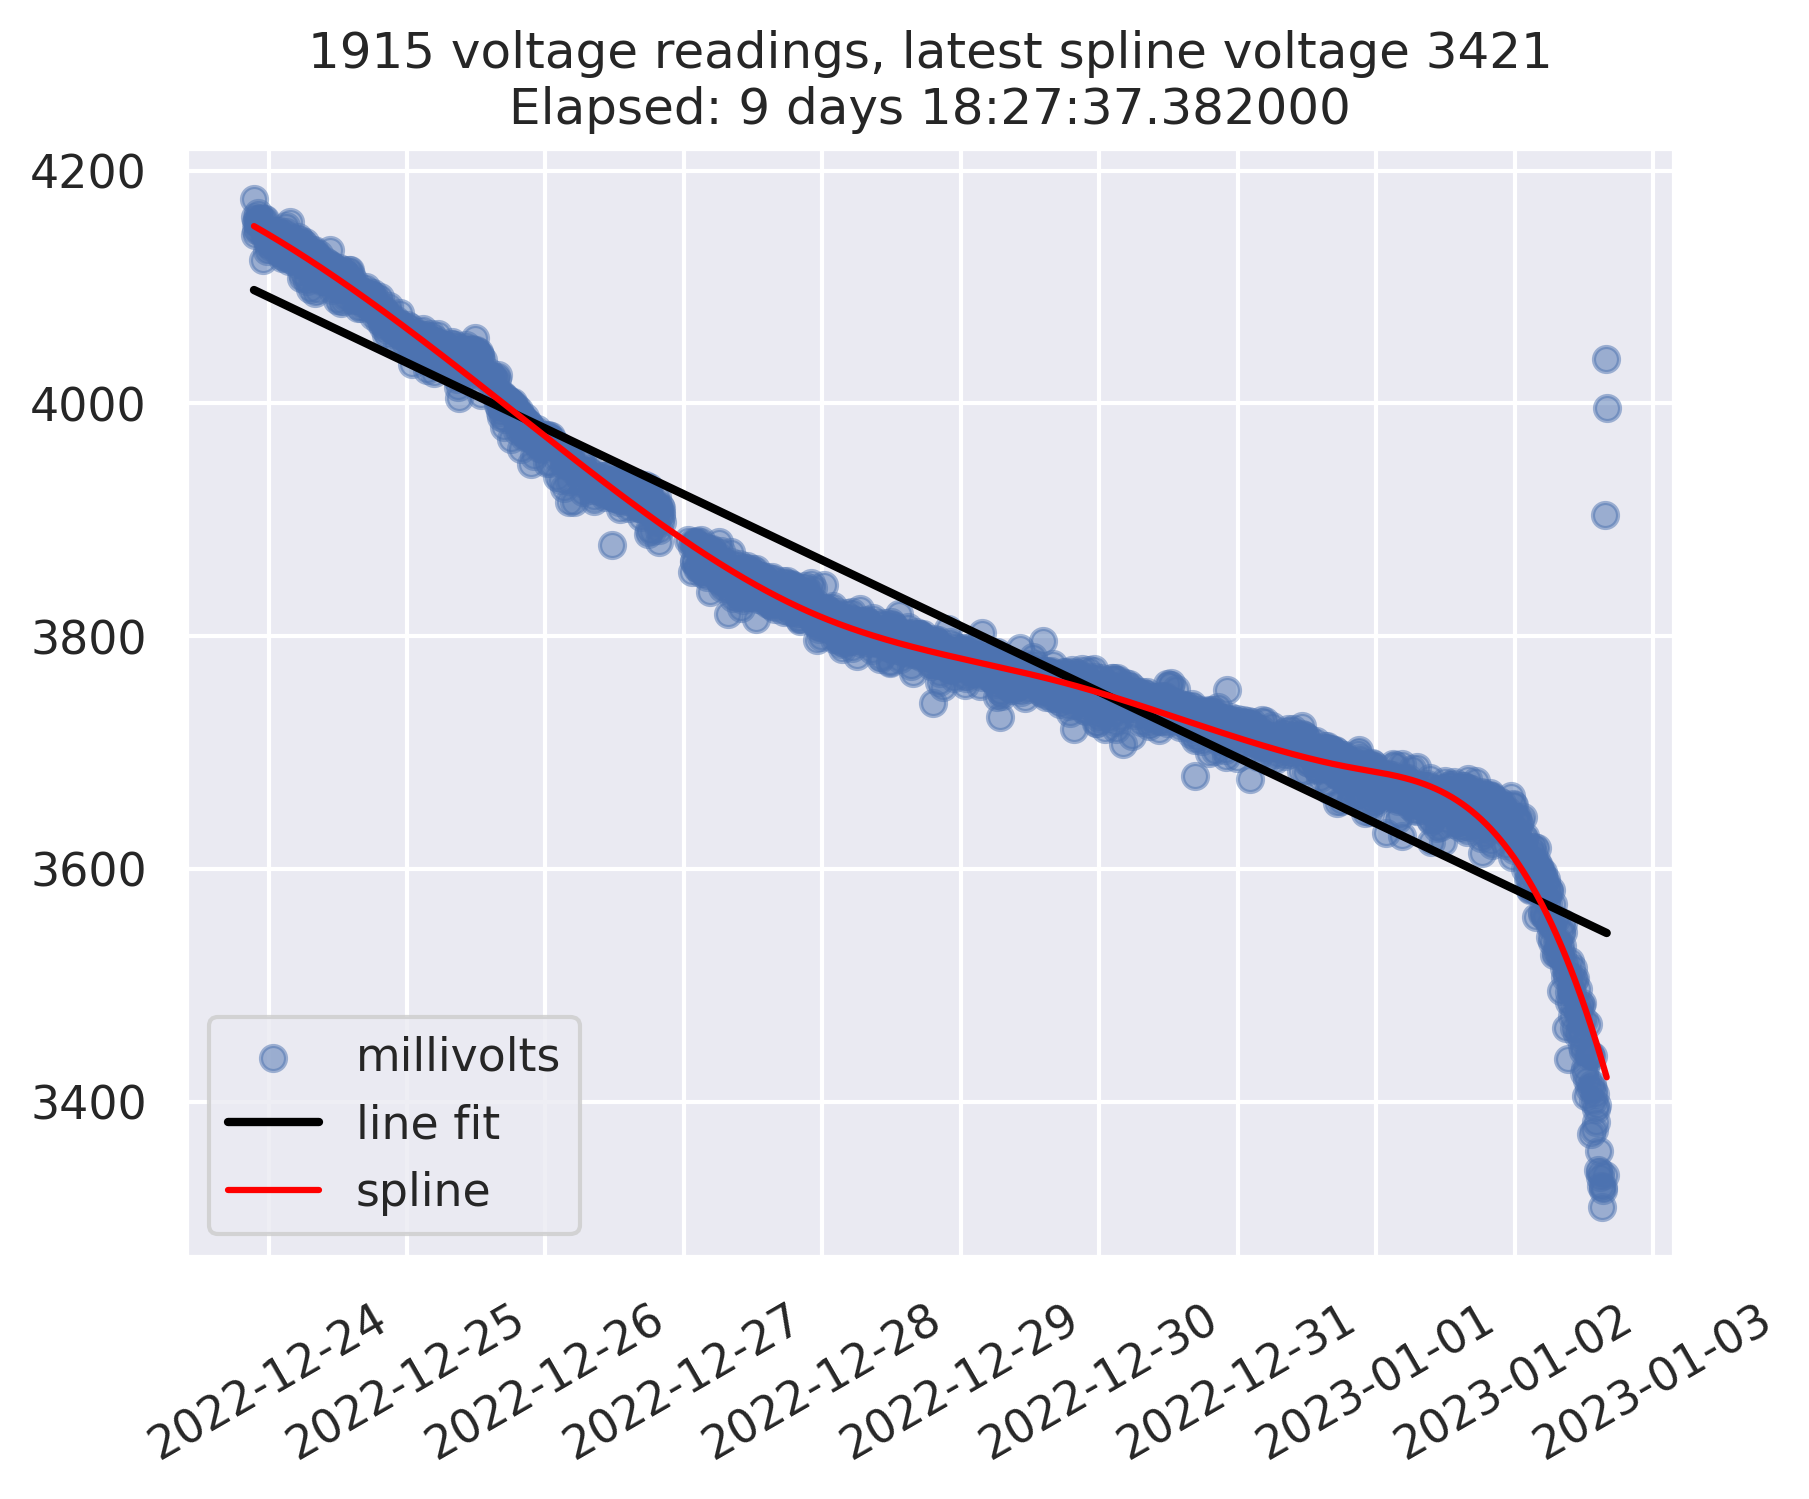

In [439]:
plt.axes().xaxis_date("America/Los_Angeles")
plt.xticks(rotation=30);

# plot linear regression
x  = mdates.date2num(df_bat["datetime"])
b, a = np.polyfit(x, df_bat["millivolts"], deg=1)
plt.scatter(
    df_bat["datetime"],df_bat["millivolts"], 
    #marker='.', 
    #color="gray", 
    #s=50,
    label='millivolts',
    alpha=0.5);
plt.plot(
    mdates.num2date(x), 
    a + b * x,  
    color="black",
    lw=2,
    label="line fit"
    #linestyle=":"
    );

from scipy.interpolate import LSQUnivariateSpline
l = len(x)
# knots = [x[0],x[int(l/2)],x[l-11]]
knot_count = 4;
knots = [x[int(len(x)*i/(knot_count+1))] for i in range(1,knot_count+1)]

spline = LSQUnivariateSpline(x,df_bat["millivolts"],knots)
plt.plot(mdates.num2date(x),spline(x),color="red",label="spline")
plt.legend()


elapsed = df_bat["datetime"].max()-df_bat["datetime"].min()
plt.title(f"{len(df_bat.millivolts)} voltage readings, latest spline voltage {spline(x[-1]):0.0f}\nElapsed: {elapsed}");


Lasted for 9 days, 18 hours before going below 3400mv, final reading before plugging in was 3327 mv

In [440]:
df_bat[-20:-1]

,topic,time_string,millivolts,datetime
datetime,,,,
2023-01-02 21:28:50.207000+00:00,battery_millivolts,2023-01-02T21:28:50.207Z,3439,2023-01-02 21:28:50.207000+00:00
2023-01-02 21:33:53.064000+00:00,battery_millivolts,2023-01-02T21:33:53.064Z,3411,2023-01-02 21:33:53.064000+00:00
2023-01-02 21:38:58.834000+00:00,battery_millivolts,2023-01-02T21:38:58.834Z,3401,2023-01-02 21:38:58.834000+00:00
2023-01-02 21:49:09.550000+00:00,battery_millivolts,2023-01-02T21:49:09.550Z,3376,2023-01-02 21:49:09.550000+00:00
2023-01-02 21:54:12.243000+00:00,battery_millivolts,2023-01-02T21:54:12.243Z,3407,2023-01-02 21:54:12.243000+00:00
2023-01-02 22:04:22.755000+00:00,battery_millivolts,2023-01-02T22:04:22.755Z,3394,2023-01-02 22:04:22.755000+00:00
2023-01-02 22:09:25.657000+00:00,battery_millivolts,2023-01-02T22:09:25.657Z,3383,2023-01-02 22:09:25.657000+00:00
2023-01-02 22:14:28.561000+00:00,battery_millivolts,2023-01-02T22:14:28.561Z,3397,2023-01-02 22:14:28.561000+00:00
2023-01-02 22:24:39.483000+00:00,battery_millivolts,2023-01-02T22:24:39.483Z,3341,2023-01-02 22:24:39.483000+00:00


Text(0, 0.5, 'Volts')

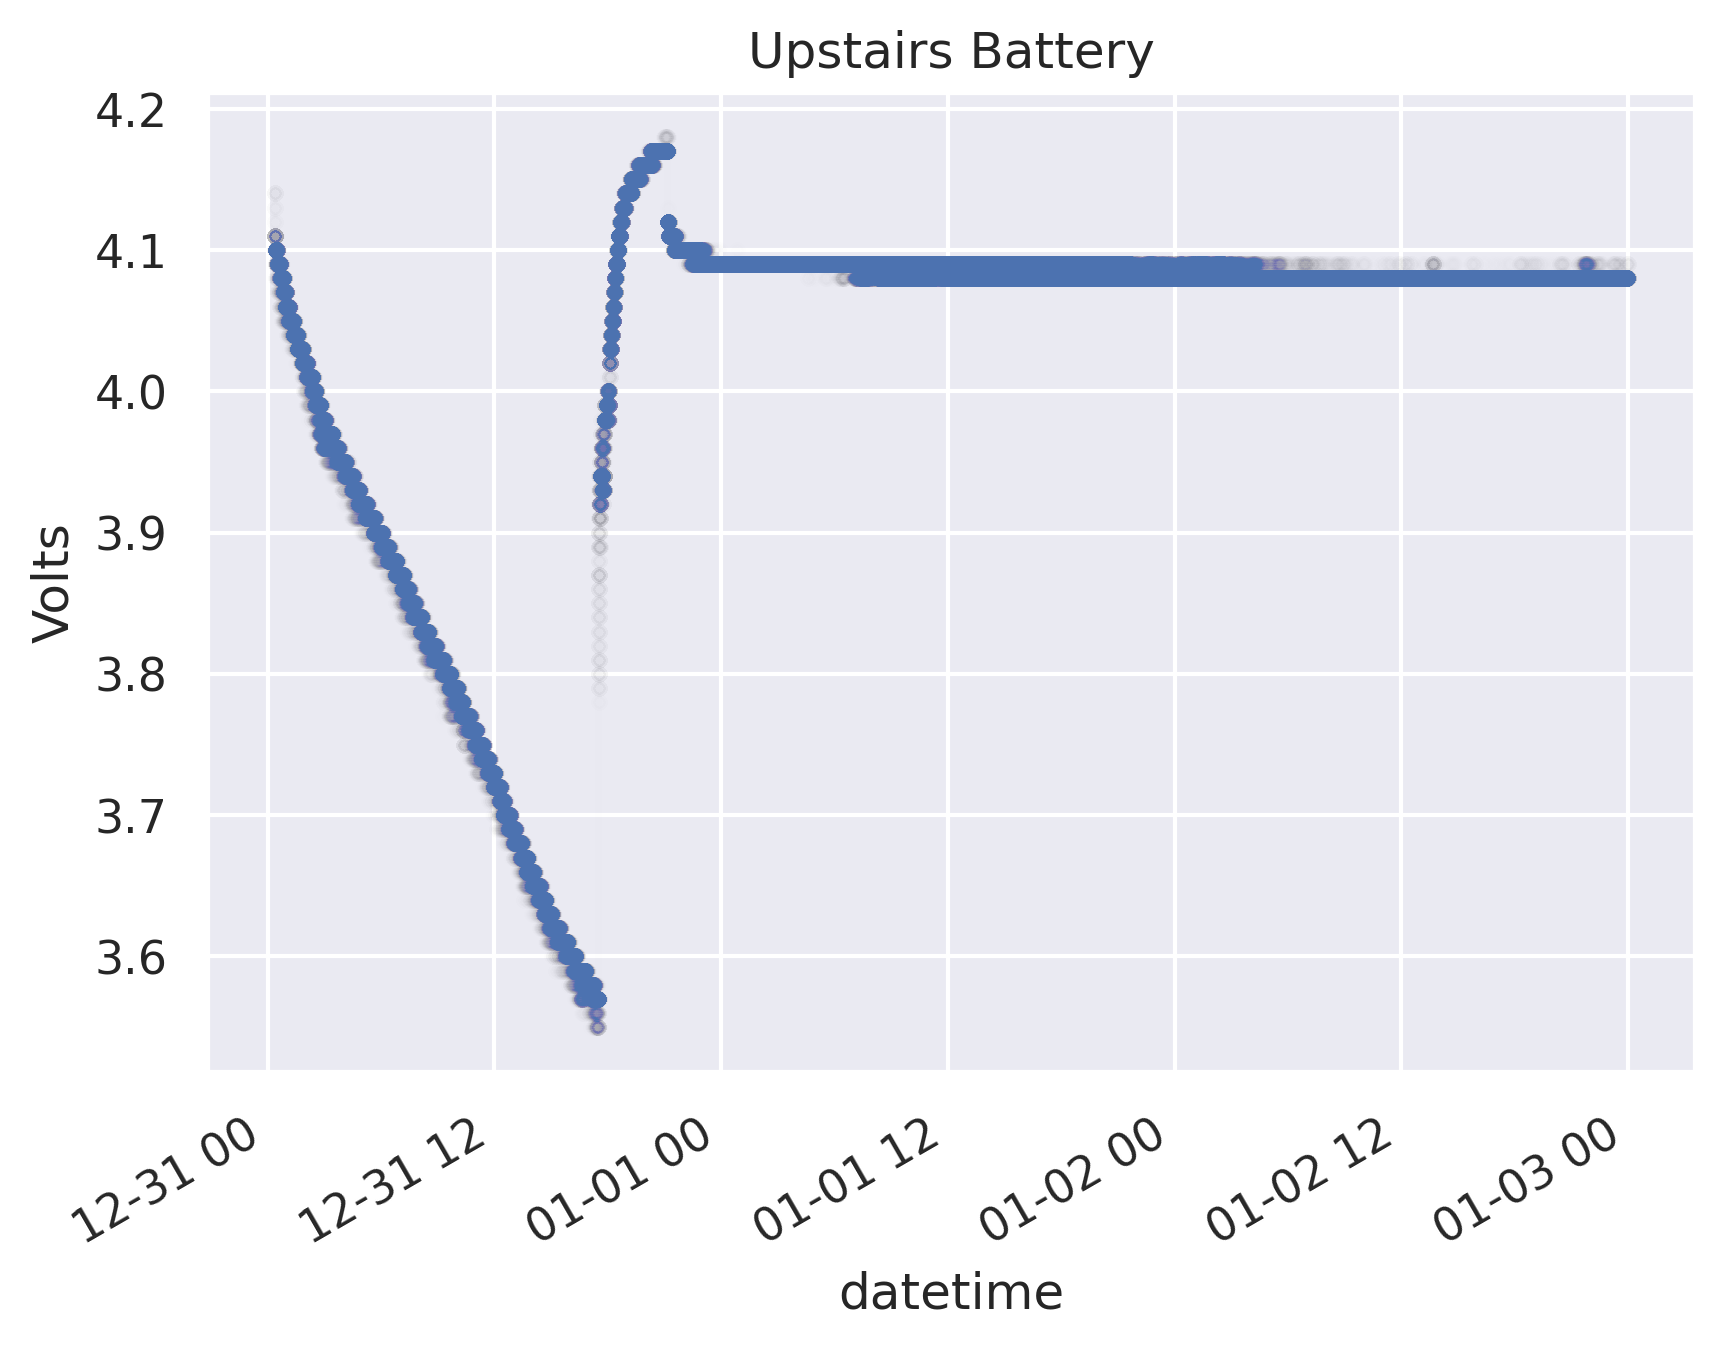

In [441]:
ax = df_bat2.volts.plot(marker=".",alpha=0.003);
ax.set_title("Upstairs Battery")
ax.yaxis.set_label_text("Volts")
